<a href="https://colab.research.google.com/github/shrutij104/Assignment-6/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# Load dataset (Breast Cancer)
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [4]:
# Train-test split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Define models
models = {
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', solver='liblinear'),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear'),
    "Logistic Regression (ElasticNet)": LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=10000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


Logistic Regression (L2):
Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
F1 Score: 0.9861


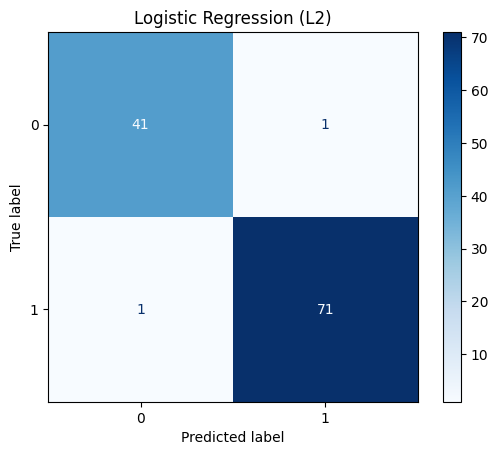


Logistic Regression (L1):
Accuracy: 0.9912
Precision: 0.9863
Recall: 1.0000
F1 Score: 0.9931


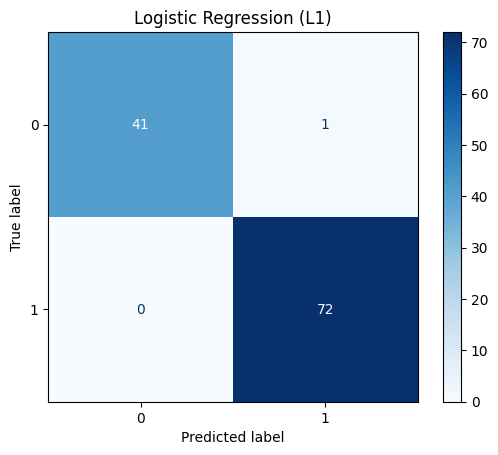


Logistic Regression (ElasticNet):
Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
F1 Score: 0.9861


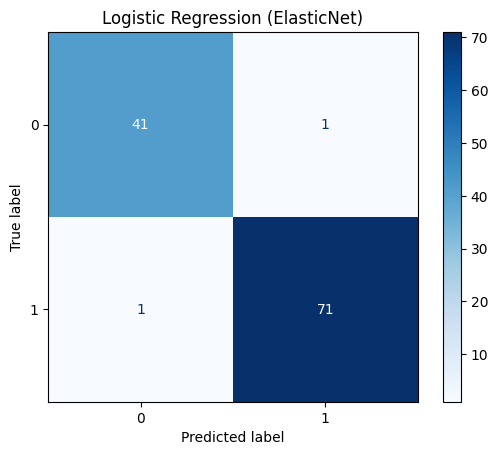


Random Forest:
Accuracy: 0.9561
Precision: 0.9589
Recall: 0.9722
F1 Score: 0.9655


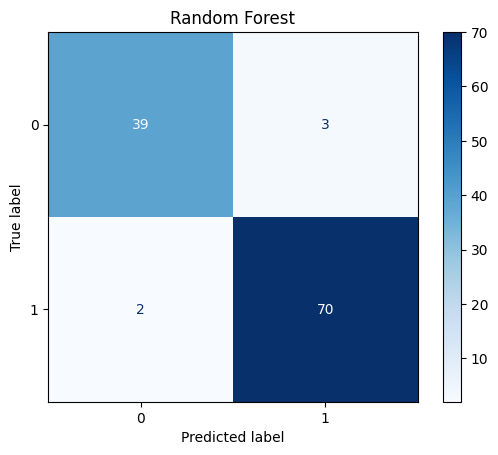


Gradient Boosting:
Accuracy: 0.9561
Precision: 0.9467
Recall: 0.9861
F1 Score: 0.9660


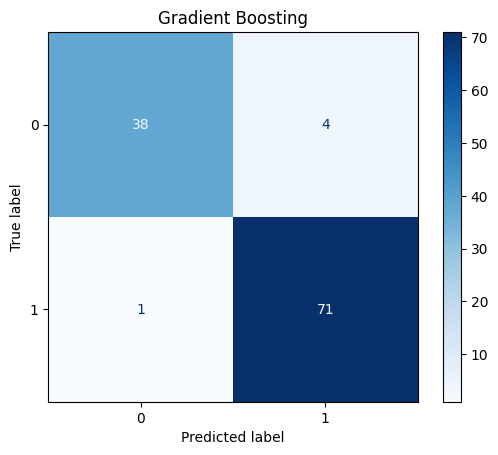


SVM:
Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
F1 Score: 0.9861


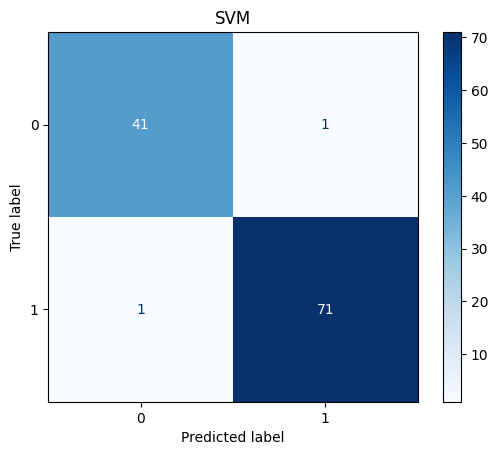


KNN:
Accuracy: 0.9561
Precision: 0.9589
Recall: 0.9722
F1 Score: 0.9655


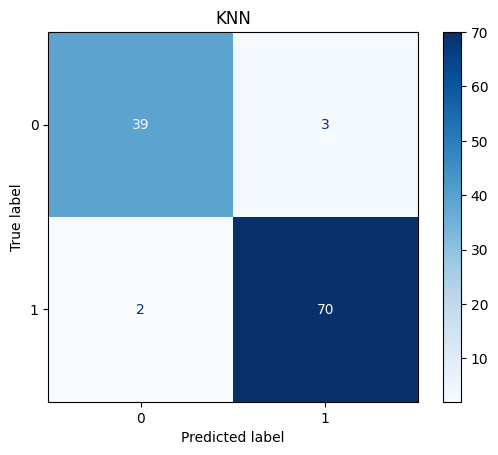


Naive Bayes:
Accuracy: 0.9298
Precision: 0.9444
Recall: 0.9444
F1 Score: 0.9444


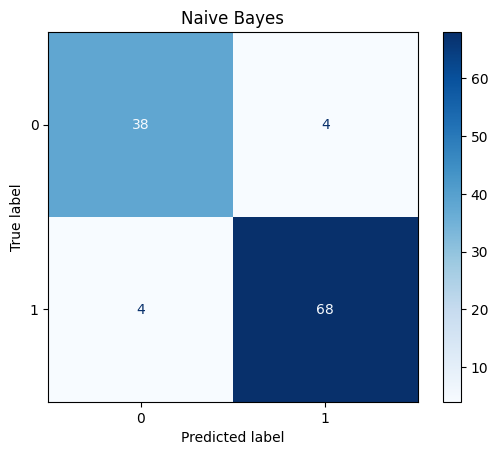

In [7]:
# Evaluate models
def evaluate_model(name, model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap='Blues')
    plt.title(name)
    plt.show()

for name, model in models.items():
    evaluate_model(name, model)


Stacking Classifier:
Accuracy: 0.9737
Precision: 0.9859
Recall: 0.9722
F1 Score: 0.9790


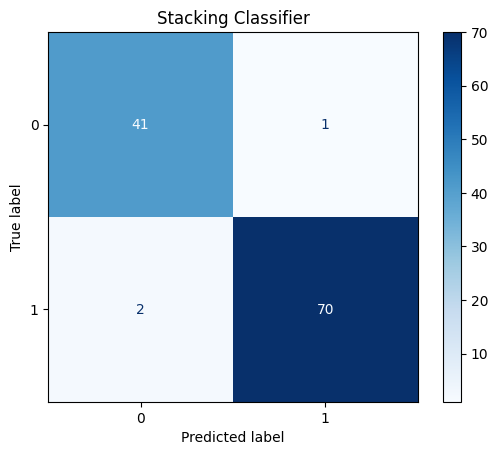

In [8]:
# Add Stacking Classifier
stacking_model = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(penalty='l2', solver='liblinear')),
        ('rf', RandomForestClassifier()),
        ('svc', SVC(probability=True))
    ],
    final_estimator=LogisticRegression()
)
evaluate_model("Stacking Classifier", stacking_model)

In [9]:
# Hyperparameter Tuning (example: Random Forest)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train_scaled, y_train)

best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
print("\nBest Random Forest After GridSearch:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


Best Random Forest After GridSearch:
Accuracy: 0.9561
Precision: 0.9589
Recall: 0.9722
F1 Score: 0.9655
